In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/Jony/Multiclass BRATS/')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
# We have 4 Classes
classes = 4
cur_path = os.getcwd()

In [4]:
cur_path

'C:\\Users\\Jony\\Multiclass BRATS'

In [8]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
            
#glioma_tumor = 0
#meningioma_tumor = 1
#no_tumor = 2
#pituitary_tumor = 3

In [10]:
data = np.array(data)
labels = np.array(labels)

In [11]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [12]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [13]:
print(data.shape, labels.shape)

(4912, 30, 30, 3) (4912,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3929, 30, 30, 3) (983, 30, 30, 3) (3929,) (983,)


In [16]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 4 classes that's why we have defined 4 in the dense
model.add(Dense(4, activation='softmax'))

In [18]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
123/123 [==============================] - 11s 89ms/step - loss: 0.3568 - accuracy: 0.8679 - val_loss: 0.3327 - val_accuracy: 0.8911
Epoch 2/30
123/123 [==============================] - 11s 90ms/step - loss: 0.3392 - accuracy: 0.8707 - val_loss: 0.2969 - val_accuracy: 0.8973
Epoch 3/30
123/123 [==============================] - 11s 87ms/step - loss: 0.3468 - accuracy: 0.8666 - val_loss: 0.3306 - val_accuracy: 0.8779
Epoch 4/30
123/123 [==============================] - 12s 100ms/step - loss: 0.3179 - accuracy: 0.8834 - val_loss: 0.2931 - val_accuracy: 0.9064
Epoch 5/30
123/123 [==============================] - 11s 93ms/step - loss: 0.2851 - accuracy: 0.9030 - val_loss: 0.2787 - val_accuracy: 0.8952
Epoch 6/30
123/123 [==============================] - 11s 89ms/step - loss: 0.2794 - accuracy: 0.9033 - val_loss: 0.3292 - val_accuracy: 0.8769
Epoch 7/30
123/123 [==============================] - 11s 90ms/step - loss: 0.3069 - accuracy: 0.8934 - val_loss: 0.2288 - val_accuracy

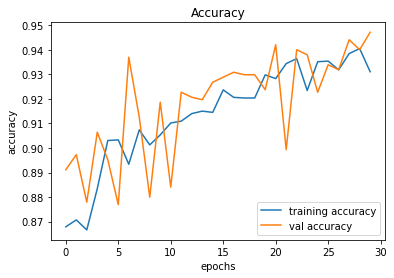

In [22]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

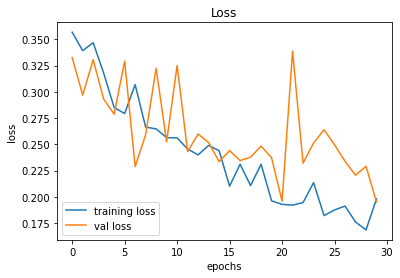

In [23]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
model.save("./training/TSR.h5")

In [29]:
import os
os.chdir(r'C:\Users\Jony\Multiclass BRATS')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [30]:
# Classes of brain tumors
classes = { 0:'glioma_tumor',
            1:'meningioma_tumor', 
            2:'no_tumor', 
            3:'pituitary_tumor'
          }

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

Predicted tumor is:  no_tumor


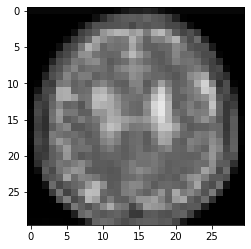

In [35]:
plot,prediction = test_on_img(r'C:/Users/Jony/Multiclass BRATS/test/2/image(18).jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted tumor is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted tumor is:  glioma_tumor


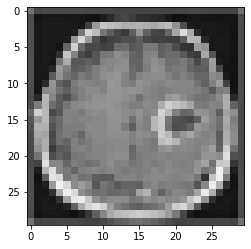

In [36]:
plot,prediction = test_on_img(r'C:\Users\Jony\Multiclass BRATS\test\0\image(28).jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted tumor is: ", classes[a])
plt.imshow(plot)
plt.show()